## The Sparks Foundation Internship 2021

## Jitender Kumar

## Predicting Marks using supervised ML

### predict the percentage of student on the basis of no of study hours
### this is simple Linear regression task have only 2 variables


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
marks=pd.read_csv('http://bit.ly/w-data')# read the dataset

In [5]:
marks.head()# here is the head of dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
marks.shape #shape of dataset

(25, 2)

In [7]:
marks.info() # here is information related to dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
marks.describe() # statistical presntation of data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Cleaning the Data 

In [11]:
marks.isnull().sum() # there is no null value

Hours     0
Scores    0
dtype: int64

## Ploting the data to see the relationship between Hours and Scores using scatterplot

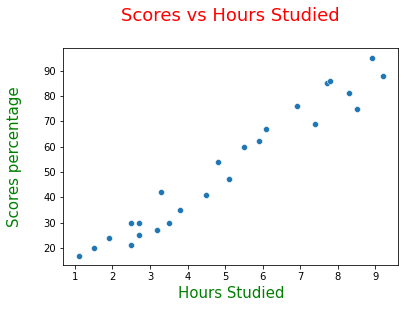

In [16]:
sns.scatterplot(x=marks['Hours'],y=marks['Scores'])
plt.title('Scores vs Hours Studied\n',fontsize=18,color='r')
plt.xlabel('Hours Studied\n',fontsize=15,color='g')
plt.ylabel('Scores percentage\n',fontsize=15,color='g');

__In this plot we can see that there is a positive correlation between both Hours and Scores__

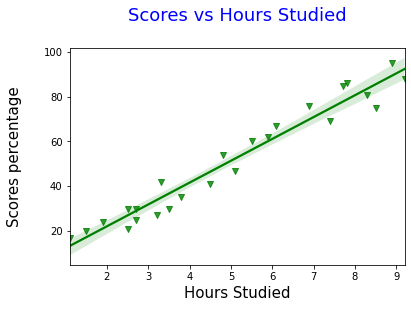

In [31]:
sns.regplot(x=marks['Hours'],y=marks['Scores'],color='g',marker ='v')
plt.title('Scores vs Hours Studied\n',fontsize=18,color='b')
plt.xlabel('Hours Studied\n',fontsize=15,color='black')
plt.ylabel('Scores percentage\n',fontsize=15,color='black');

In [32]:
corr=marks.corr() # here we can see correlation using heatmap
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


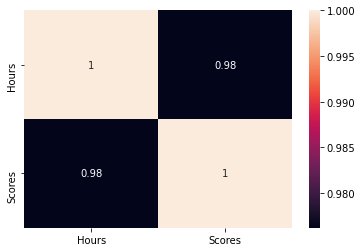

In [33]:
sns.heatmap(corr,annot=True);

### we can say that they are highly correlated to each other

# split the Model into train_test 

In [36]:
X = marks.iloc[:, :-1].values  
Y = marks.iloc[:, 1].values
train_X, val_X, train_y, val_y = train_test_split(X, Y, random_state = 0)

## Fitting the Model

In [37]:
regression = LinearRegression()
regression.fit(train_X, train_y)

LinearRegression()

## Predicting the percentage of marks scored by students

In [38]:
pred_y = regression.predict(val_X)#predicting marks percentage over hours
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


## Comparing predicted marks vs Actual marks

In [39]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Let's built a scatterplot to see it visually

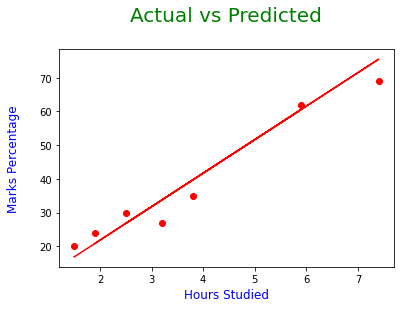

In [45]:
plt.scatter(x=val_X, y=val_y, color='r')
plt.plot(val_X, pred_y, color='r')
plt.title('Actual vs Predicted\n', fontsize=20,color='g')
plt.ylabel('Marks Percentage\n', fontsize=12,color='b')
plt.xlabel('Hours Studied\n', fontsize=12,color='b');

## Evaluating the model

In [41]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


## predicted score of student if He/She studid 9.25 hrs

In [42]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


## According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.

        ##                                                 Thank you